<a href="https://colab.research.google.com/github/uzonyiadam/image-recognition-coreml-stitch/blob/master/Image_Recognition_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

print('y_train shape', y_train.shape)
print(x_test.shape[0], 'test samples')

print('x_test shape', x_test.shape)
print(y_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
y_train shape (50000, 1)
10000 test samples
x_test shape (10000, 32, 32, 3)
10000 test samples


In [3]:
# Declare variables
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
epochs = 100
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
print(class_names[int(y_train[25416])])
print(range(x_train.shape[0]))
count=0
for e in range(x_train.shape[0]):
 # print(e)
  if class_names[int(y_train[e])]=="airplane":
    count=count+1
print(count)

#Kiíratjuk elsőnek az airplane classba tartozó elemek számát
count1=0
for f in range(x_train.shape[0]):
  if class_names[int(y_train[f])]=="cat":
     count1=count1+1
print(count1)
usedtotrain=[]

percentCount=0
percentCount1=0
for f in range(x_train.shape[0]):
  if class_names[int(y_train[f])]=="cat" or class_names[int(y_train[f])]=="bird" or class_names[int(y_train[f])]=="dog":
    percentCount1=percentCount1+1
    if percentCount%2==0:
    #print("ok")
      usedtotrain.append(f)
  else:
    percentCount=percentCount+1
    if percentCount%50==0: 
      usedtotrain.append(f)


#ellenőrzöm a usetotrain array-emet.
#cnt=0
#print(usedtotrain)
#for t in range(9500):
#  if y_train[usedtotrain][t]==6:
#    cnt=cnt+1

#print(cnt)

x_train=x_train[usedtotrain,:]
y_train=y_train[usedtotrain,:]
#print(x_train.shape)
#print(y_train.shape)

usedtotrain1=[]
cnt1=0
for gj in range(50000):
  cnt1=cnt1+1
  if cnt1%10==0:
    usedtotrain1.append(cnt1-1)
  

#x_train=x_train[usedtotrain1,:]
#y_train=y_train[usedtotrain1,:]
#ellenőrizzük a shape-jét az új módosított x_train és y_train függvényünknek

print(x_train.shape)
print(y_train.shape)

frog
range(0, 50000)
5000
5000
(8213, 32, 32, 3)
(8213, 1)


In [5]:
def plot_images(x, y, number_of_images=5):
  fig, axes1 = plt.subplots(number_of_images,number_of_images,figsize=(8,8))
  for j in range(number_of_images):
      for k in range(number_of_images):
          i = np.random.choice(range(len(x)))
          title = class_names[y[i:i+1][0][0]]
          axes1[j][k].title.set_text(title)
          axes1[j][k].set_axis_off()
          axes1[j][k].imshow(x[i:i+1][0])        

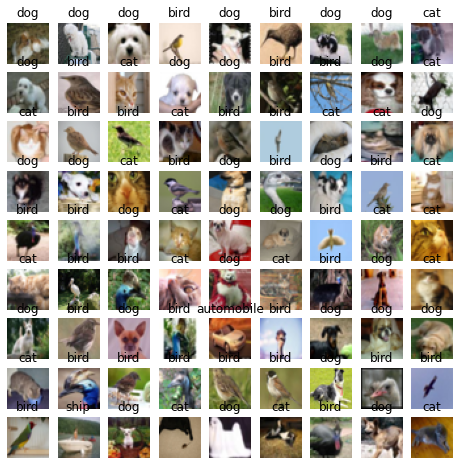

In [6]:
plot_images(x_train, y_train, number_of_images=9)

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Epoch 1/100
257/257 [==============================] - 2s 8ms/step - loss: 1.5361 - accuracy: 0.3166 - val_loss: 2.7530 - val_accuracy: 0.1014
Epoch 2/100
257/257 [==============================] - 2s 7ms/step - loss: 1.4378 - accuracy: 0.3686 - val_loss: 2.6021 - val_accuracy: 0.1490
Epoch 3/100
257/257 [==============================] - 2s 7ms/step - loss: 1.3397 - accuracy: 0.4529 - val_loss: 2.5930 - val_accuracy: 0.1537
Epoch 4/100
257/257 [==============================] - 2s 7ms/step - loss: 1.2869 - accuracy: 0.4706 - val_loss: 2.4356 - val_accuracy: 0.1586
Epoch 5/100
257/257 [==============================] - 2s 7ms/step - loss: 1.2327 - accuracy: 0.4942 - val_loss: 2.4323 - val_accuracy: 0.1761
Epoch 6/100
257/257 [==============================] - 2s 7ms/step - loss: 1.1899 - accuracy: 0.5132 - val_loss: 2.4186 - val_accuracy: 0.1944
Epoch 7/100
257/257 [==============================] - 2s 7ms/step - loss: 1.1554 - accuracy: 0.5322 - val_loss: 2.2869 - val_accuracy: 0.2425

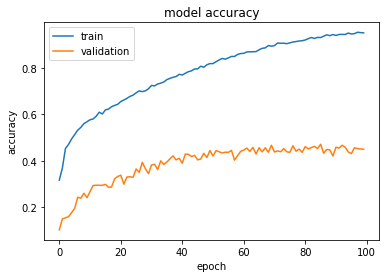

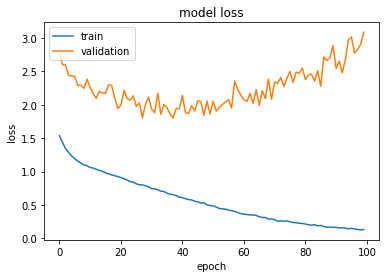

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# Train the model
history=model.fit(x_train / 255.0, tf.keras.utils.to_categorical(y_train),
          batch_size=batch_size,
          shuffle=True,
          epochs=epochs,
          validation_data=(x_test / 255.0, tf.keras.utils.to_categorical(y_test))
          )

# Evaluate the model
scores = model.evaluate(x_test / 255.0, tf.keras.utils.to_categorical(y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)
 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()